## DS 598 Team 1 Exploratory Data Analysis

To run the below codes, downloaded cleaned data from our silver layer to Google Drive and mount it.

In [1]:
# mount Google Drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/'team1blob'

LA_Air_Quality.parquet	    ne_daily_aqi_df.parquet	     Silver_Coal_New_England.parquet
la_aqi_monthly_agg.parquet  New_England_Air_Quality.parquet  Silver_Natural_Gas_LA.parquet
la_daily_aqi_df.parquet     Silver_Coal_LA.parquet	     Silver_Natural_Gas_New_England.parquet


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# read files

# note that these air quality data are us aqi calculated from aqi extracted from OpenWeather
ne_air_quality_df = pd.read_parquet('/content/drive/MyDrive/team1blob/ne_daily_aqi_df.parquet')
la_air_quality_df = pd.read_parquet('/content/drive/MyDrive/team1blob/la_daily_aqi_df.parquet')

ne_natural_df = pd.read_parquet('/content/drive/MyDrive/team1blob/Silver_Natural_Gas_New_England.parquet')
la_natural_df = pd.read_parquet('/content/drive/MyDrive/team1blob/Silver_Natural_Gas_LA.parquet')

ne_coal_df = pd.read_parquet('/content/drive/MyDrive/team1blob/Silver_Coal_New_England.parquet')
la_coal_df = pd.read_parquet('/content/drive/MyDrive/team1blob/Silver_Coal_LA.parquet')

In [31]:
print(ne_natural_df.head())
print(ne_coal_df.head())

       period respondent  respondent-name    type-name timezone   value  \
0  2024-11-20       ISNE  ISO New England  Natural Gas  Eastern  175462   
1  2024-11-19       ISNE  ISO New England  Natural Gas  Eastern  175081   
2  2024-11-18       ISNE  ISO New England  Natural Gas  Eastern  169011   
3  2024-11-17       ISNE  ISO New England  Natural Gas  Eastern  156379   
4  2024-11-16       ISNE  ISO New England  Natural Gas  Eastern  153889   

     value-units  
0  megawatthours  
1  megawatthours  
2  megawatthours  
3  megawatthours  
4  megawatthours  
       period respondent  respondent-name type-name timezone value  \
0  2024-11-19       ISNE  ISO New England      Coal  Eastern    17   
1  2024-11-18       ISNE  ISO New England      Coal  Eastern    16   
2  2024-11-15       ISNE  ISO New England      Coal  Eastern    64   
3  2024-11-14       ISNE  ISO New England      Coal  Eastern    60   
4  2024-11-13       ISNE  ISO New England      Coal  Eastern    92   

     value-uni

In [32]:
print(la_natural_df.head())
print(la_coal_df.head())

       period respondent                            respondent-name  \
0  2024-11-20       LDWP  Los Angeles Department of Water and Power   
1  2024-11-19       LDWP  Los Angeles Department of Water and Power   
2  2024-11-18       LDWP  Los Angeles Department of Water and Power   
3  2024-11-17       LDWP  Los Angeles Department of Water and Power   
4  2024-11-16       LDWP  Los Angeles Department of Water and Power   

     type-name timezone  value    value-units  
0  Natural Gas  Pacific  19331  megawatthours  
1  Natural Gas  Pacific  19370  megawatthours  
2  Natural Gas  Pacific  17216  megawatthours  
3  Natural Gas  Pacific   2472  megawatthours  
4  Natural Gas  Pacific  11988  megawatthours  
       period respondent                            respondent-name type-name  \
0  2024-11-20       LDWP  Los Angeles Department of Water and Power      Coal   
1  2024-11-19       LDWP  Los Angeles Department of Water and Power      Coal   
2  2024-11-18       LDWP  Los Angeles Depa

In [33]:
print(ne_air_quality_df.head())
print(la_air_quality_df.head())

  corrected_timestamp    aqi
0          2020-11-27  50.58
1          2020-11-28  45.75
2          2020-11-29  36.75
3          2020-11-30  69.04
4          2020-12-01  66.42
  corrected_timestamp     aqi
0          2020-11-27  104.00
1          2020-11-28  106.29
2          2020-11-29  115.38
3          2020-11-30  129.04
4          2020-12-01  140.46


In [34]:
# make sure 'period' column is in datetime datatype
ne_natural_df['period'] = pd.to_datetime(ne_natural_df['period'])
ne_coal_df['period'] = pd.to_datetime(ne_coal_df['period'])

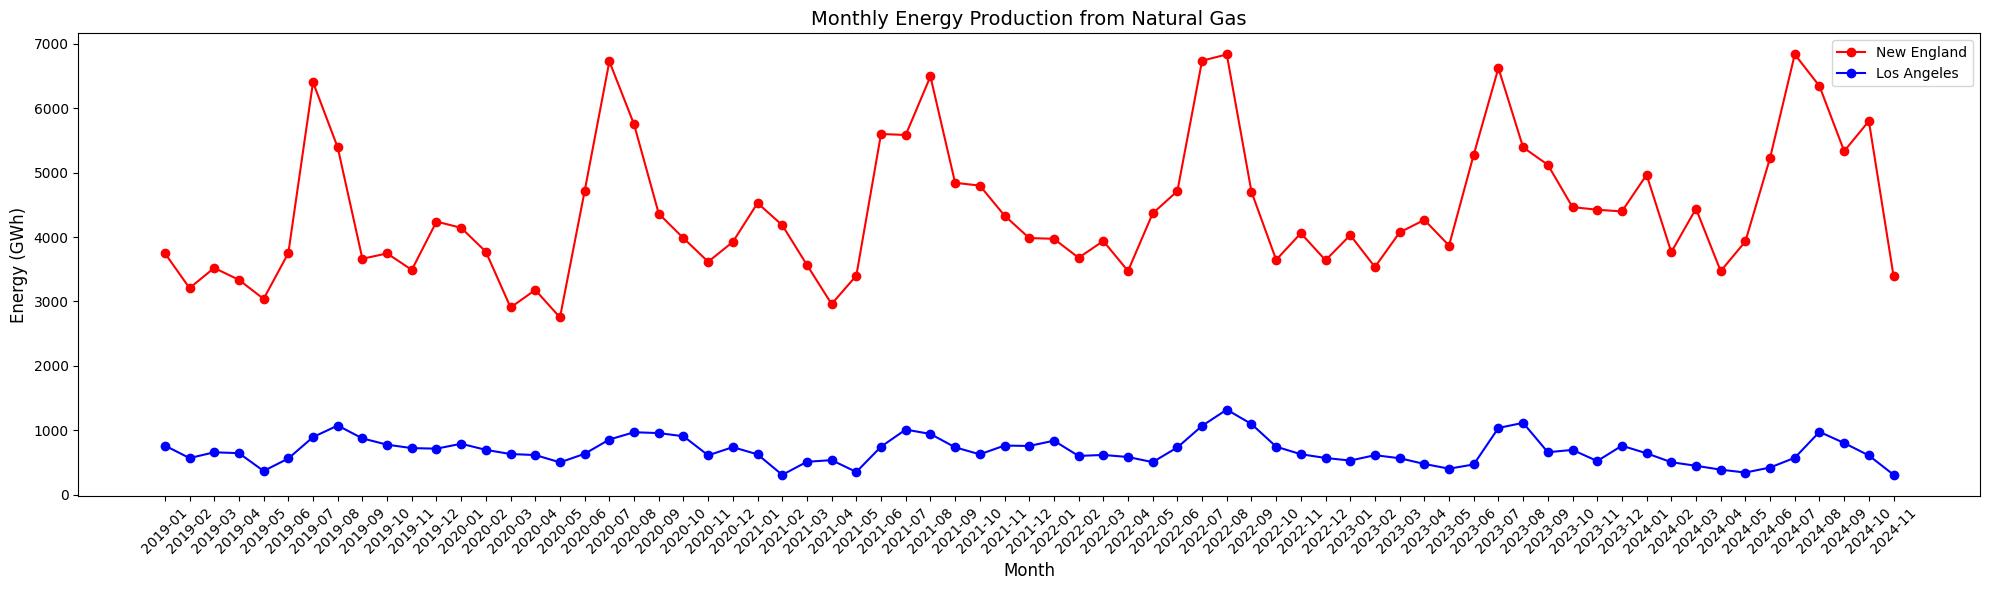

In [37]:
# sum daily electricity generation based on month
ne_natural_df['period'] = pd.to_datetime(ne_natural_df['period'])
ne_natural_df['value'] = ne_natural_df['value'].astype(float)
ne_natural_df['month'] = ne_natural_df['period'].dt.to_period('M')
monthly_data = ne_natural_df.groupby('month')['value'].sum().reset_index()

la_natural_df['period'] = pd.to_datetime(la_natural_df['period'])
la_natural_df['value'] = la_natural_df['value'].astype(float)
la_natural_df['month'] = la_natural_df['period'].dt.to_period('M')
monthly_la_data = la_natural_df.groupby('month')['value'].sum().reset_index()

plt.figure(figsize=(20, 6))
# simplify to Gigawatt-hours (GWh)
plt.plot(monthly_data['month'].astype(str), monthly_data['value'] / 1000, marker='o', linestyle='-',
         color='red', label='New England')

plt.plot(monthly_la_data['month'].astype(str), monthly_la_data['value'] / 1000, marker='o', linestyle='-',
         color='blue', label='Los Angeles')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Energy (GWh)', fontsize=12)
plt.title('Monthly Energy Production from Natural Gas', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

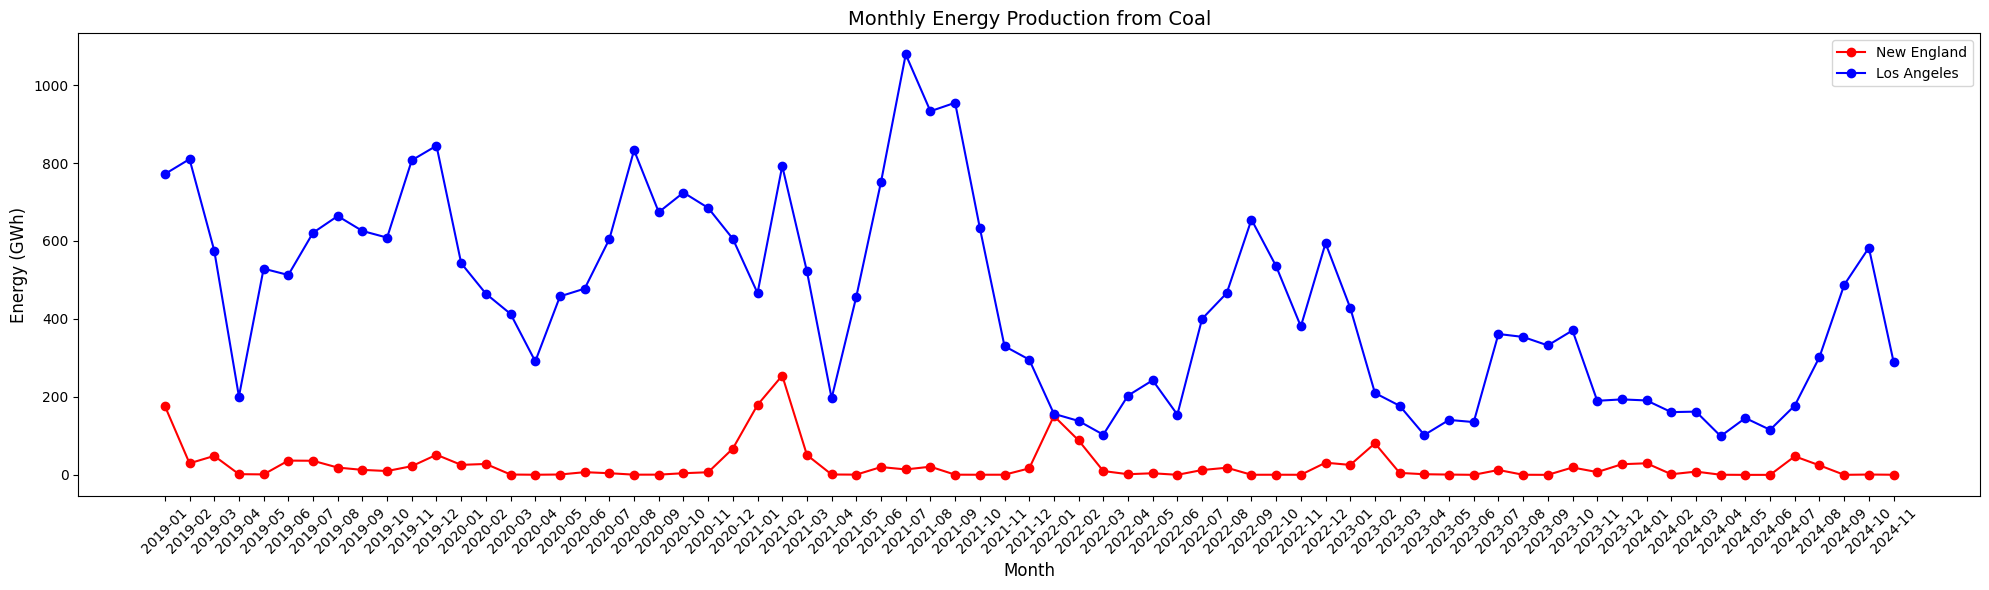

In [38]:
# drop nan values and make sure values are in appropriate datatypes
ne_coal_df.loc[:, 'period'] = pd.to_datetime(ne_coal_df['period']).dropna()
ne_coal_df['period'] = pd.to_datetime(ne_coal_df['period'])
ne_coal_df['month'] = ne_coal_df['period'].dt.to_period('M')
ne_coal_df['value'] = ne_coal_df['value'].astype(float)

la_coal_df.loc[:, 'period'] = pd.to_datetime(la_coal_df['period']).dropna()
la_coal_df['period'] = pd.to_datetime(la_coal_df['period'])
la_coal_df['month'] = la_coal_df['period'].dt.to_period('M')
la_coal_df.loc[:, 'value'] = la_coal_df['value'].astype(float)

monthly_coal_data = ne_coal_df.groupby('month')['value'].sum().reset_index()
la_monthly_coal_data = la_coal_df.groupby('month')['value'].sum().reset_index()

plt.figure(figsize=(20, 6))

# Convert from megawatthours to gigawatthours
plt.plot(monthly_coal_data['month'].astype(str), monthly_coal_data['value'] / 1000, marker='o', linestyle='-',
         color='red', label = 'New England')
plt.plot(la_monthly_coal_data['month'].astype(str), la_monthly_coal_data['value'] / 1000, marker='o', linestyle='-',
         color='blue', label = 'Los Angeles')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Energy (GWh)', fontsize=12)
plt.title('Monthly Energy Production from Coal', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

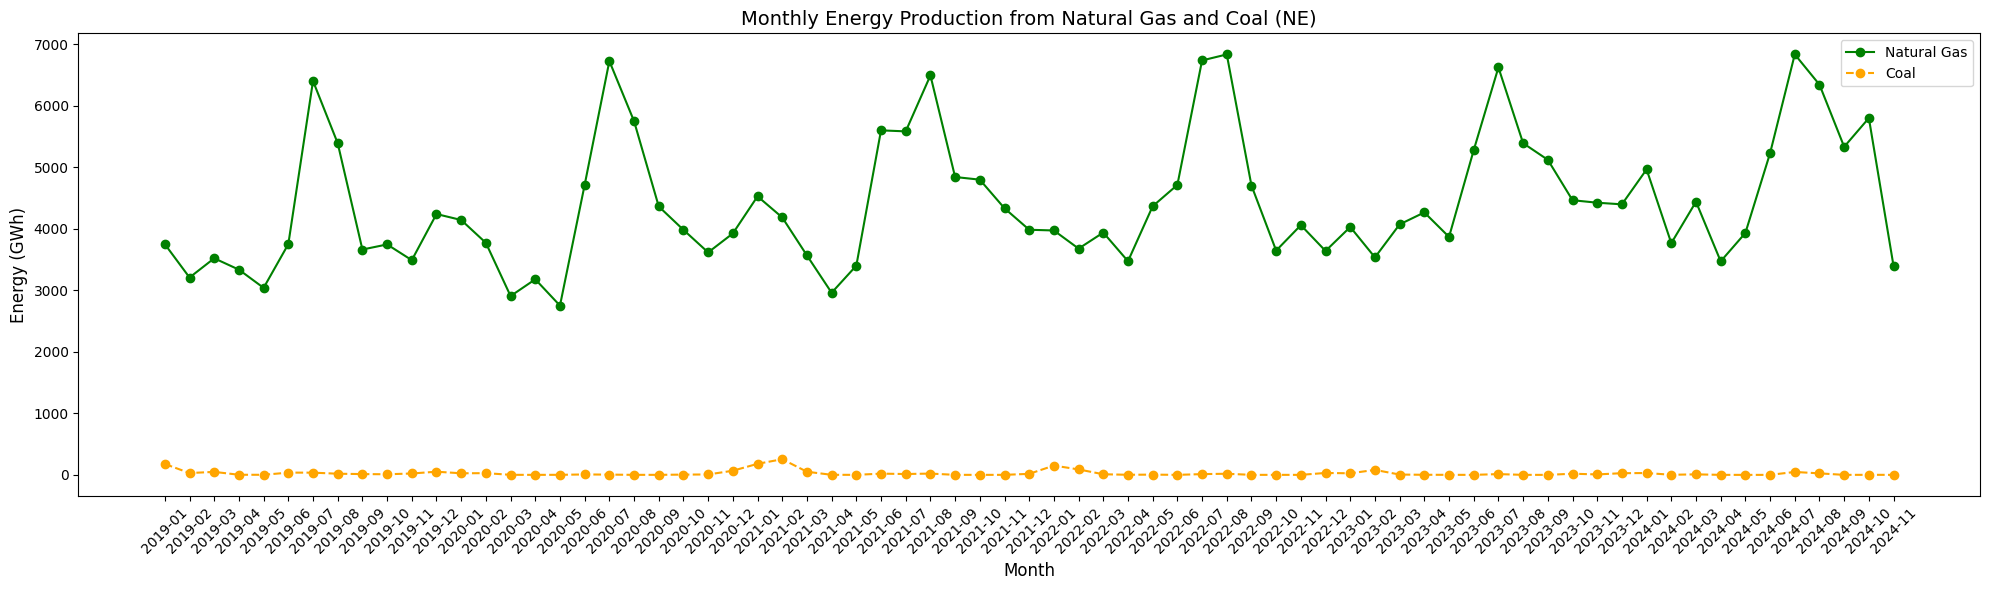

In [41]:
plt.figure(figsize=(20, 6))
plt.plot(monthly_data['month'].astype(str), monthly_data['value'] / 1000, marker='o', linestyle='-',
         color='green', label='Natural Gas')

plt.plot(monthly_coal_data['month'].astype(str), monthly_coal_data['value'] / 1000,
         marker='o', linestyle='--', color='orange', label='Coal')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Energy (GWh)', fontsize=12)
plt.title('Monthly Energy Production from Natural Gas and Coal (NE)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

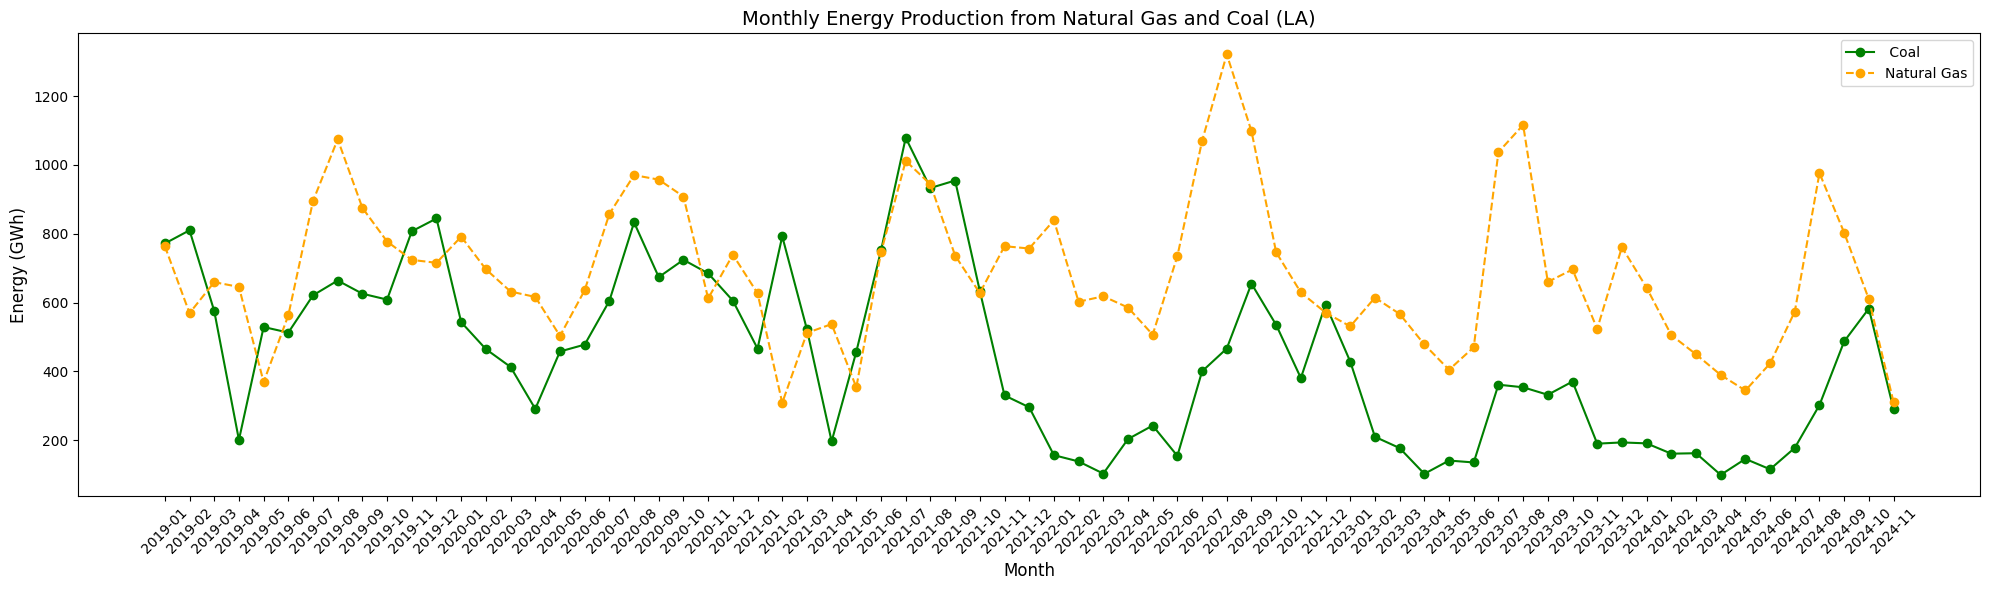

In [42]:
plt.figure(figsize=(20, 6))
plt.plot(la_monthly_coal_data['month'].astype(str), la_monthly_coal_data['value'] / 1000,
         marker='o', linestyle='-', color='green', label=' Coal')

plt.plot(monthly_la_data['month'].astype(str), monthly_la_data['value'] / 1000,
         marker='o', linestyle='--', color='orange', label='Natural Gas')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Energy (GWh)', fontsize=12)
plt.title('Monthly Energy Production from Natural Gas and Coal (LA)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

**ADF Test**

If p-value < significant_level AND the test statistic is less than the critical value, then the time series is concluded to be stationary.
Otherwise, the data is not stationary.

**Note: A stationary time series is a time series whose statistical properties, such as its mean, variance, and autocorrelation, do not change over time

In [43]:
from statsmodels.tsa.stattools import adfuller

In [44]:
# Augmneted Dickey-Fuller test

def adf_test(df):
    fuel_type = df['type-name'].unique()[0]
    region = df['respondent-name'].unique()[0]
    value = df['value'].dropna()
    print(f'Results of Dickey Fuller Test of {region,fuel_type} : ')
    dftest = adfuller(value, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [45]:
df_list = [ne_natural_df, la_natural_df, ne_coal_df, la_coal_df]
for df in df_list:
    print(adf_test(df))

Results of Dickey Fuller Test of ('ISO New England', 'Natural Gas') : 
Test Statistic                   -4.309820
p-value                           0.000427
#Lags Used                       23.000000
Number of Observations Used    2127.000000
Critical Value (1%)              -3.433428
Critical Value (5%)              -2.862900
Critical Value (10%)             -2.567494
dtype: float64
None
Results of Dickey Fuller Test of ('Los Angeles Department of Water and Power', 'Natural Gas') : 
Test Statistic                   -4.212234
p-value                           0.000628
#Lags Used                       26.000000
Number of Observations Used    2101.000000
Critical Value (1%)              -3.433466
Critical Value (5%)              -2.862917
Critical Value (10%)             -2.567503
dtype: float64
None
Results of Dickey Fuller Test of ('ISO New England', 'Coal') : 
Test Statistic                   -5.243955
p-value                           0.000007
#Lags Used                       19.0000

In [46]:
# ADF Test on AQI for LA and New England
print('Results of Dickey Fuller Test of ISO New England AQI : ')
ne_aqi = ne_air_quality_df['aqi'].dropna()
ne_dftest = adfuller(ne_aqi, autolag='AIC')
ne_dfoutput = pd.Series(ne_dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in ne_dftest[4].items():
    ne_dfoutput['Critical Value (%s)'%key] = value
print(ne_dfoutput)

print('Results of Dickey Fuller Test of Los Angeles Department of Water and Power AQI : ')
la_aqi = la_air_quality_df['aqi'].dropna()
la_dftest = adfuller(la_aqi, autolag='AIC')
la_dfoutput = pd.Series(la_dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in la_dftest[4].items():
    la_dfoutput['Critical Value (%s)'%key] = value
print(la_dfoutput)

Results of Dickey Fuller Test of ISO New England AQI : 
Test Statistic                   -4.930804
p-value                           0.000030
#Lags Used                       17.000000
Number of Observations Used    1416.000000
Critical Value (1%)              -3.434977
Critical Value (5%)              -2.863583
Critical Value (10%)             -2.567858
dtype: float64
Results of Dickey Fuller Test of Los Angeles Department of Water and Power AQI : 
Test Statistic                   -4.197508
p-value                           0.000665
#Lags Used                       13.000000
Number of Observations Used    1420.000000
Critical Value (1%)              -3.434963
Critical Value (5%)              -2.863578
Critical Value (10%)             -2.567855
dtype: float64


**Seasonal_Decompose**

The function seasonal_decompose returns trend, seasonality, and residuals.

*   Trend: The increasing or decreasing value in the series.
*   Seasonality: The repeating short-term cycle in the series.
*   Noise: The random variation in the series.


In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [57]:
def plot_seasonal_decompose(df):
    # set index as period
    df_index = df.set_index('period')
    value = df_index['value'].dropna()

    region = df_index['respondent-name'].unique()[0]
    fuel_type = df_index['type-name'].unique()[0]

    # decompose the time series into its trend, seasonal and residuals components
    result_decompose = seasonal_decompose(df_index['value'], model='additive', period=int(len(df)/6))

    # The estimated trend component
    trend     = result_decompose.trend
    seasonal  = result_decompose.seasonal
    residuals = result_decompose.resid
    obs = result_decompose.observed

    # plot every component
    fig, axes = plt.subplots(4, 1, figsize=(20, 10))
    print(f'Seasonal Decompose of {region, fuel_type}')

    axes[0].plot(obs)
    axes[0].set_title('observed')

    axes[1].plot(seasonal)
    axes[1].set_title('seasonal')

    axes[2].plot(trend)
    axes[2].set_title('trend')

    axes[3].plot(residuals)
    axes[3].set_title('residuals')

    plt.tight_layout()
    plt.show()
    return trend


Seasonal Decompose of ('ISO New England', 'Natural Gas')


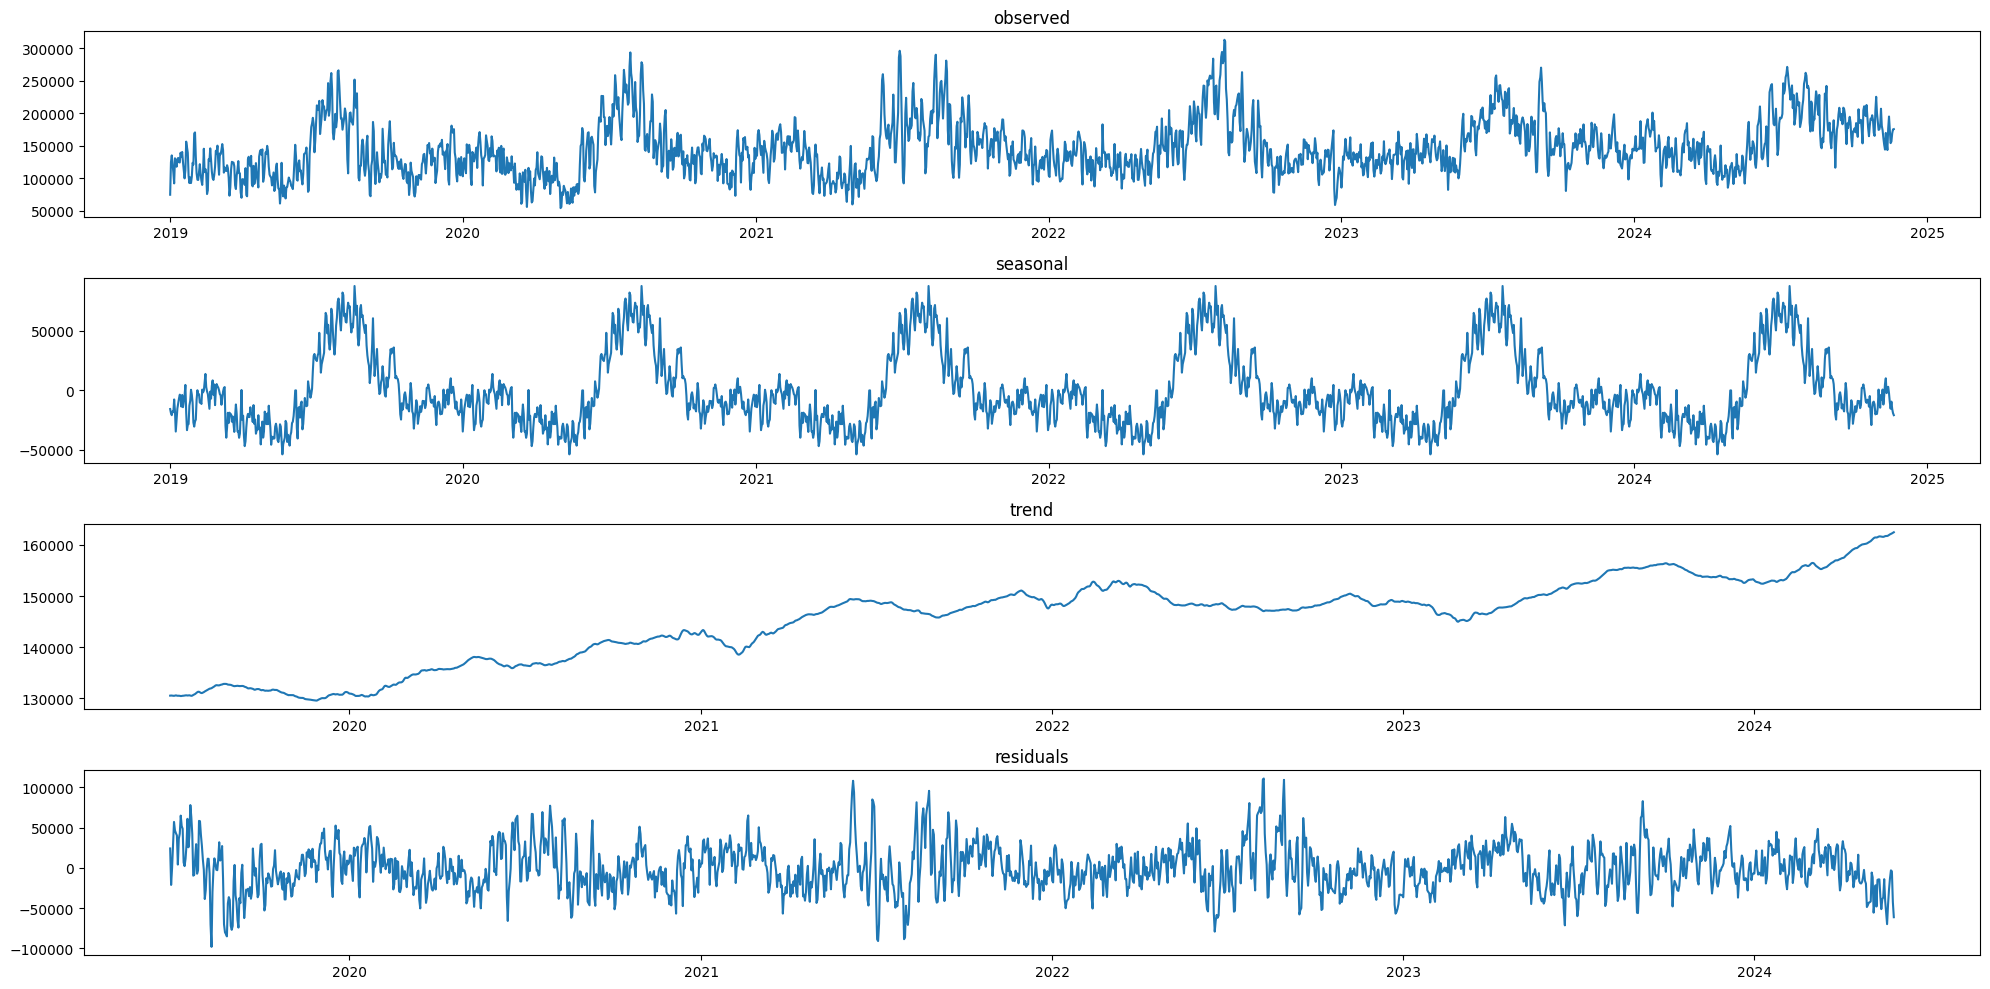

In [58]:
ne_natural_trend = plot_seasonal_decompose(ne_natural_df)

Seasonal Decompose of ('Los Angeles Department of Water and Power', 'Natural Gas')


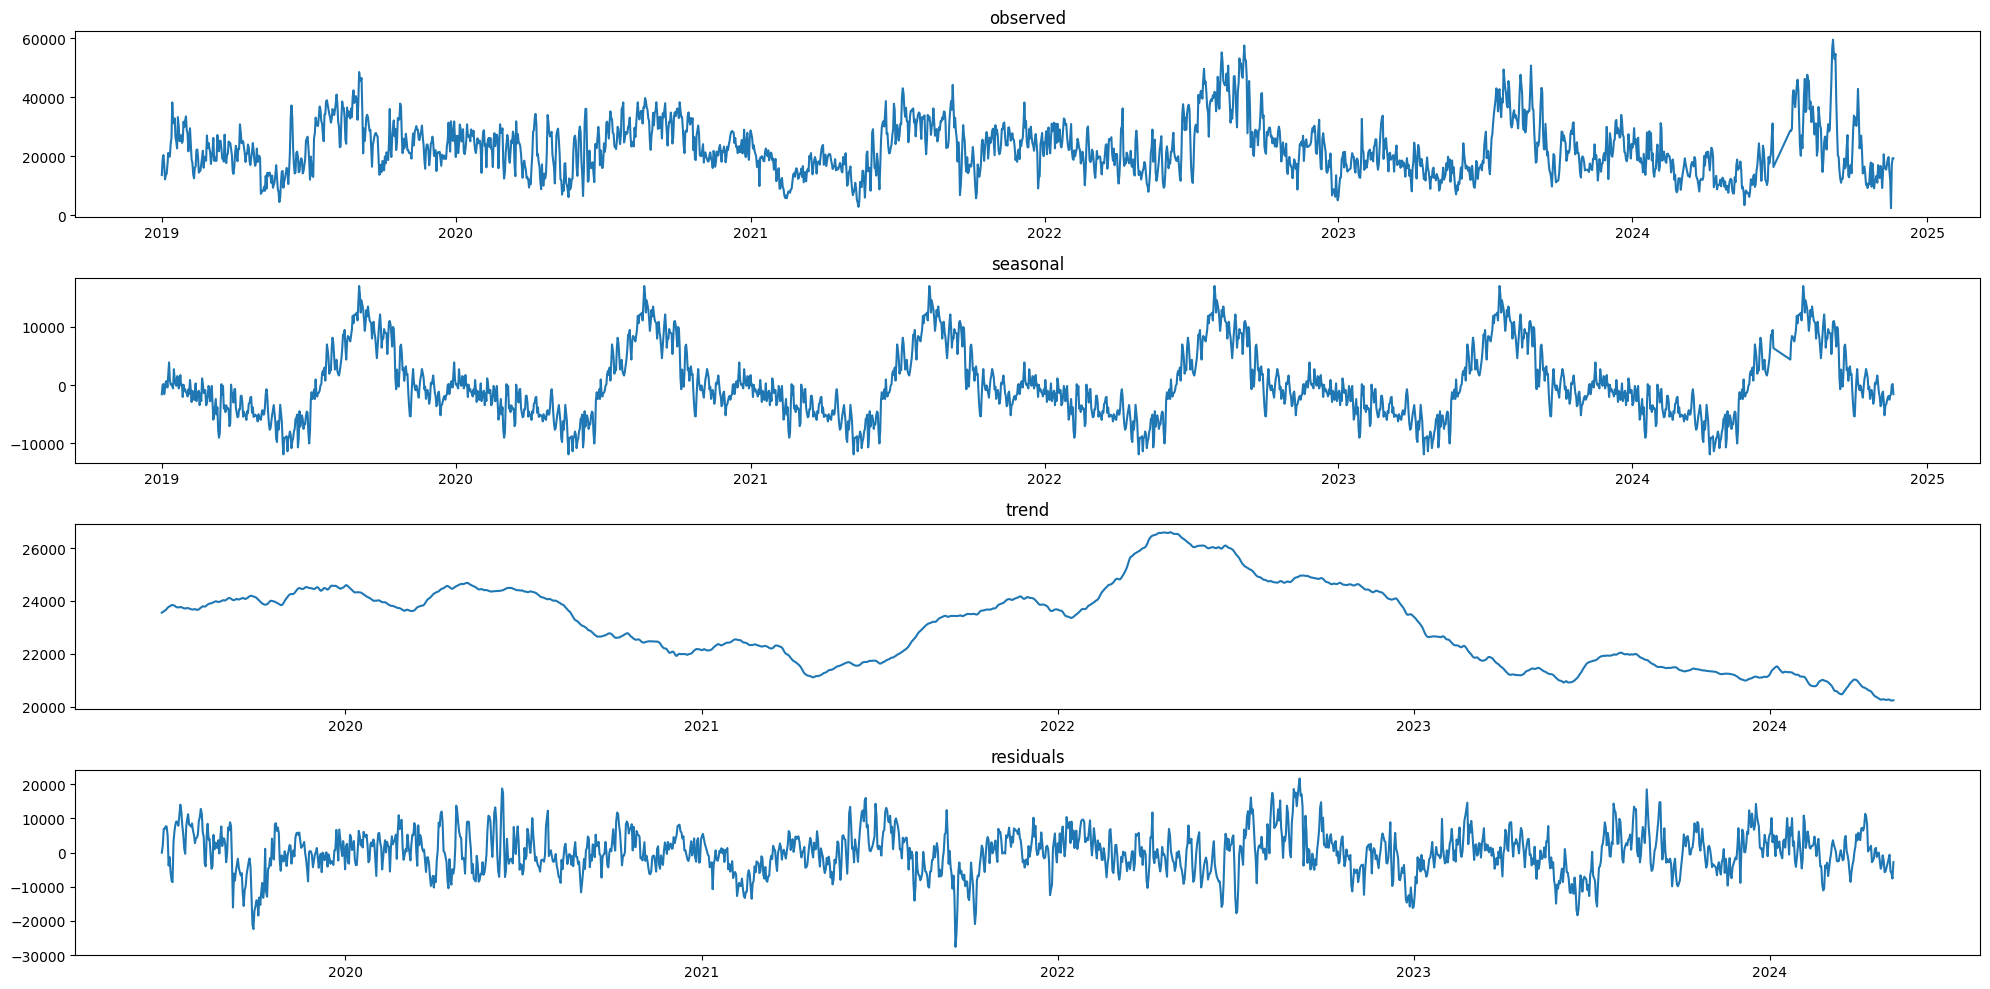

In [59]:
la_natural_trend = plot_seasonal_decompose(la_natural_df)

Seasonal Decompose of ('ISO New England', 'Coal')


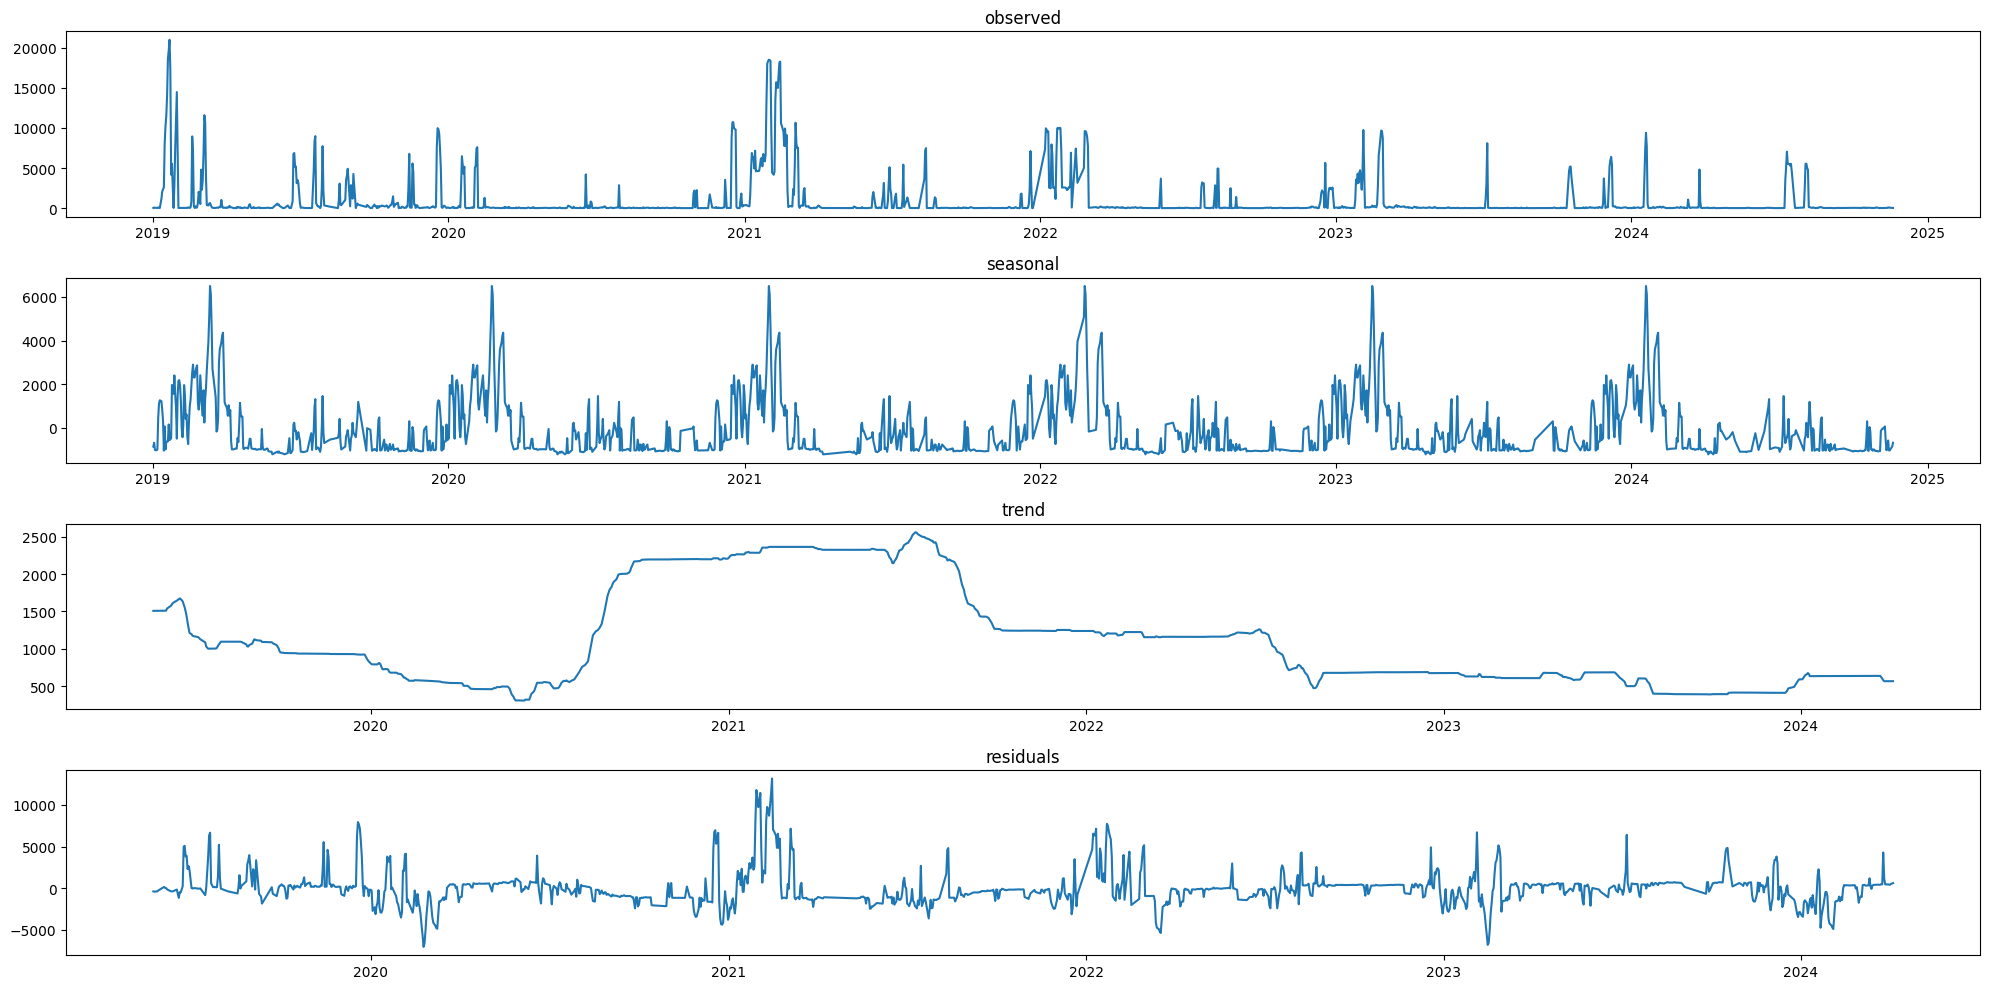

In [60]:
ne_coal_df=ne_coal_df.dropna()
ne_coal_trend = plot_seasonal_decompose(ne_coal_df)

Seasonal Decompose of ('Los Angeles Department of Water and Power', 'Coal')


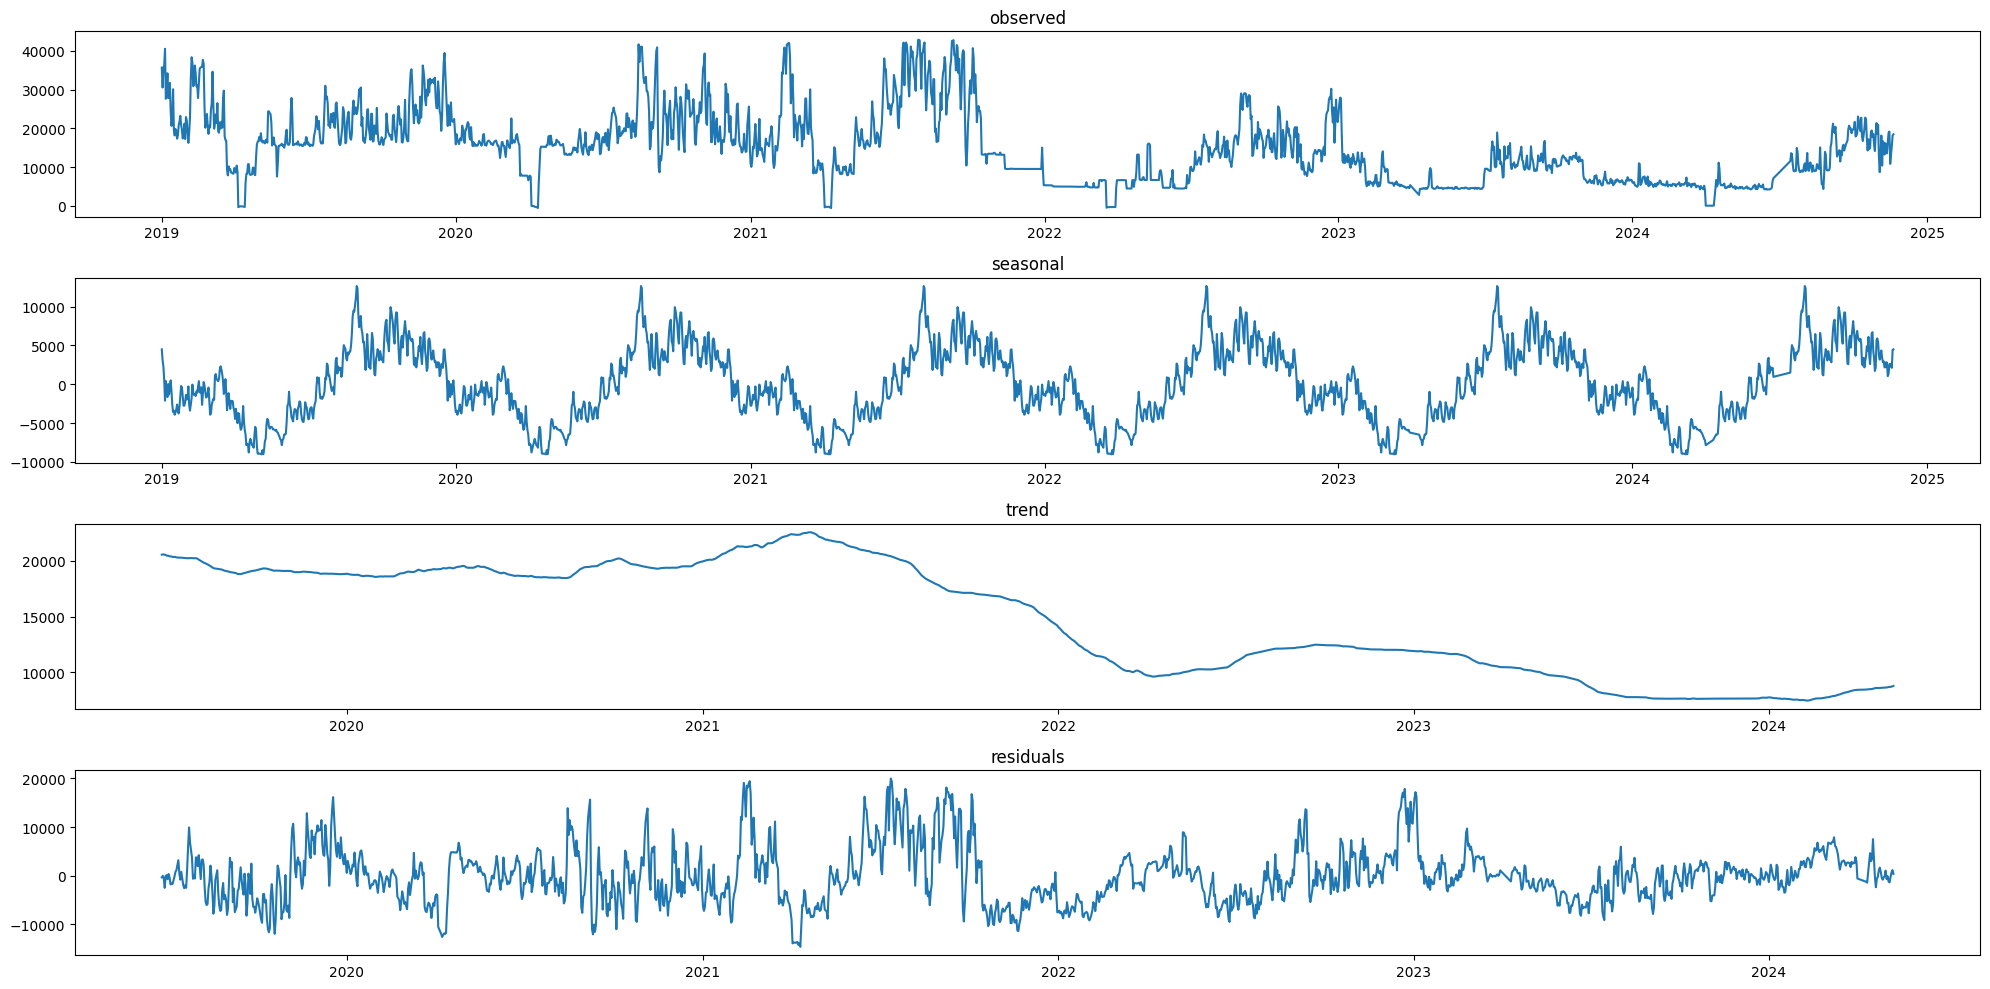

In [61]:
la_coal_trend = plot_seasonal_decompose(la_coal_df)

**Trends of natural gas and coal of New England and LA**

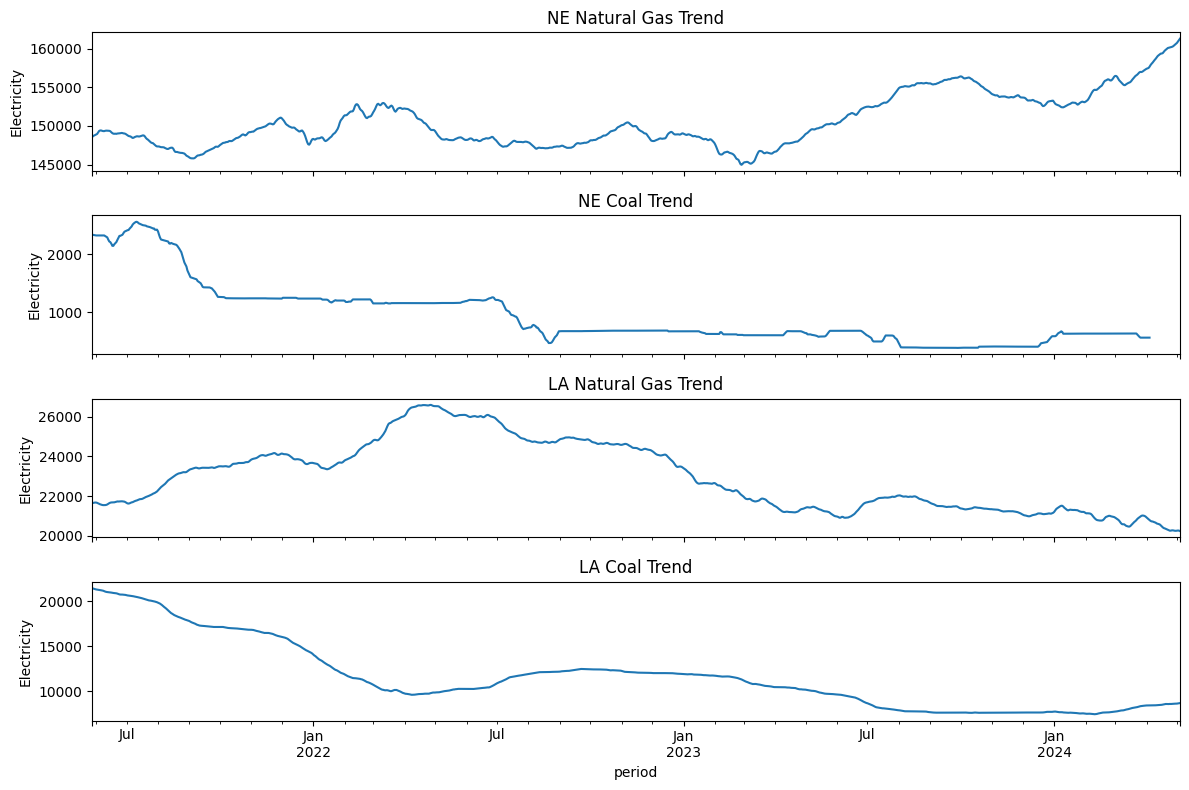

In [65]:
# to match time period with aqi data
start_date = '2021-05-28'
end_date = '2024-05-04'

# New England natural gas trend
ne_natural_df = ne_natural_trend.dropna()
ne_natural_df = ne_natural_df[ne_natural_df.index >= start_date]
ne_natural_df = ne_natural_df[ne_natural_df.index <= end_date]

# New England coal trend
ne_coal_df = ne_coal_trend.dropna()
ne_coal_df = ne_coal_df[ne_coal_df.index >= start_date]
ne_coal_df = ne_coal_df[ne_coal_df.index <= end_date]

# LA natural gas trend
la_natural_df = la_natural_trend.dropna()
la_natural_df = la_natural_df[la_natural_df.index >= start_date]
la_natural_df = la_natural_df[la_natural_df.index <= end_date]

# LA coal trend
la_coal_df = la_coal_trend.dropna()
la_coal_df = la_coal_df[la_coal_df.index >= start_date]
la_coal_df = la_coal_df[la_coal_df.index <= end_date]

fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

ne_natural_df.plot(ax=axes[0], title='NE Natural Gas Trend')
axes[0].set_ylabel('Electricity')

ne_coal_df.plot(ax=axes[1], title='NE Coal Trend')
axes[1].set_ylabel('Electricity')

la_natural_df.plot(ax=axes[2], title='LA Natural Gas Trend')
axes[2].set_ylabel('Electricity')

la_coal_df.plot(ax=axes[3], title='LA Coal Trend')
axes[3].set_ylabel('Electricity')

plt.tight_layout()
plt.show()

**New England's AQI Seasonal Decomposition**

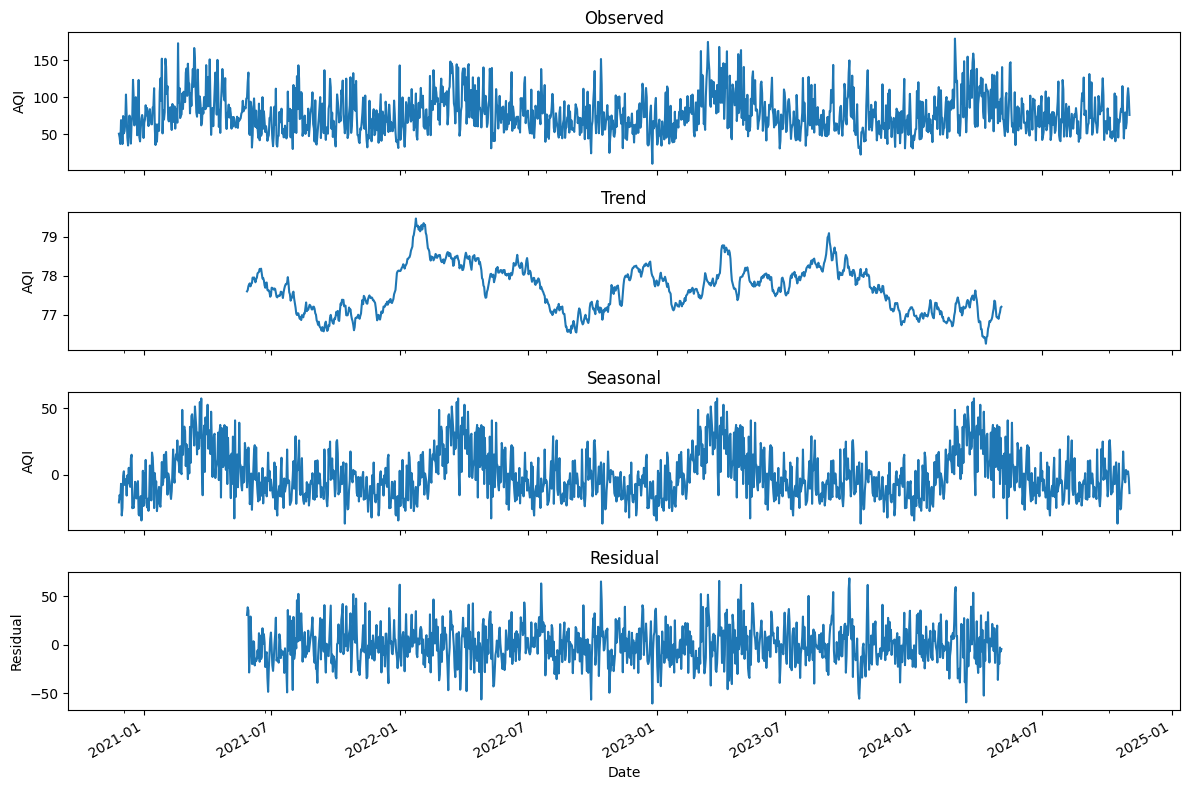

In [69]:
# New Engalnd AQI seaonal decomposition

ne_air_quality_df['corrected_timestamp'] = ne_air_quality_df['corrected_timestamp'].dt.to_timestamp()

# Set the datetime column as the index
ne_air_quality_df.set_index('corrected_timestamp', inplace=True)

# Set frequency if needed (daily frequency assumed here)
ne_air_quality_df = ne_air_quality_df.asfreq('D')
vals = ne_air_quality_df['aqi'].dropna()

# Perform Seasonal Decomposition
result = seasonal_decompose(vals, model='additive', period=365)  # Set period to approximate seasonality
ne_aqi_trend = result.trend

# Plot the results
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

result.observed.plot(ax=axes[0], title='Observed')
axes[0].set_ylabel('AQI')

result.trend.plot(ax=axes[1], title='Trend')
axes[1].set_ylabel('AQI')

result.seasonal.plot(ax=axes[2], title='Seasonal')
axes[2].set_ylabel('AQI')

result.resid.plot(ax=axes[3], title='Residual')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')

plt.tight_layout()
plt.show()

**Los Angeles' AQI Seasonal Decomposition**

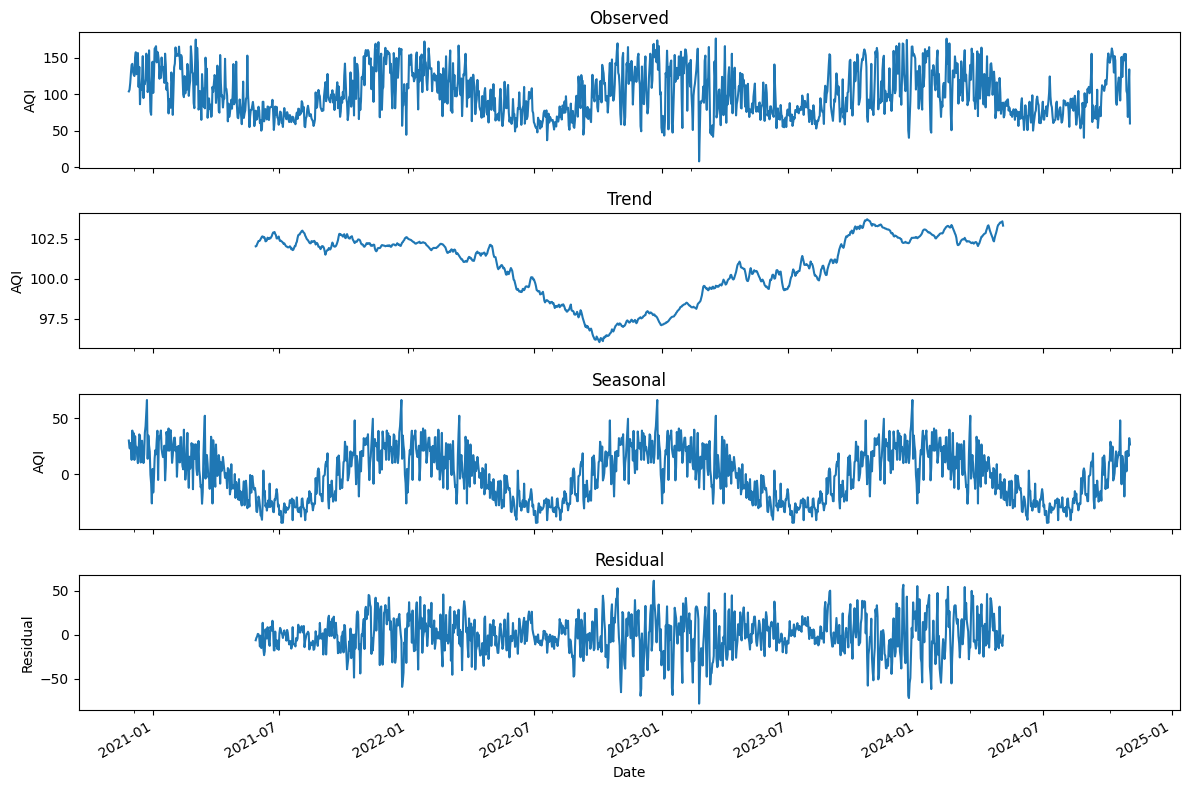

In [70]:
# Los Angeles AQI seaonal decomposition

la_air_quality_df['corrected_timestamp'] = la_air_quality_df['corrected_timestamp'].dt.to_timestamp()

# Set the datetime column as the index
la_air_quality_df.set_index('corrected_timestamp', inplace=True)

# Set frequency if needed (daily frequency assumed here)
la_air_quality_df = la_air_quality_df.asfreq('D')
la_vals = la_air_quality_df['aqi'].dropna()

# Perform Seasonal Decomposition
la_result = seasonal_decompose(la_vals, model='additive', period=365)  # Set period to approximate seasonality
la_aqi_trend = la_result.trend

# Plot the results
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

la_result.observed.plot(ax=axes[0], title='Observed')
axes[0].set_ylabel('AQI')

la_result.trend.plot(ax=axes[1], title='Trend')
axes[1].set_ylabel('AQI')

la_result.seasonal.plot(ax=axes[2], title='Seasonal')
axes[2].set_ylabel('AQI')

la_result.resid.plot(ax=axes[3], title='Residual')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')

plt.tight_layout()
plt.show()

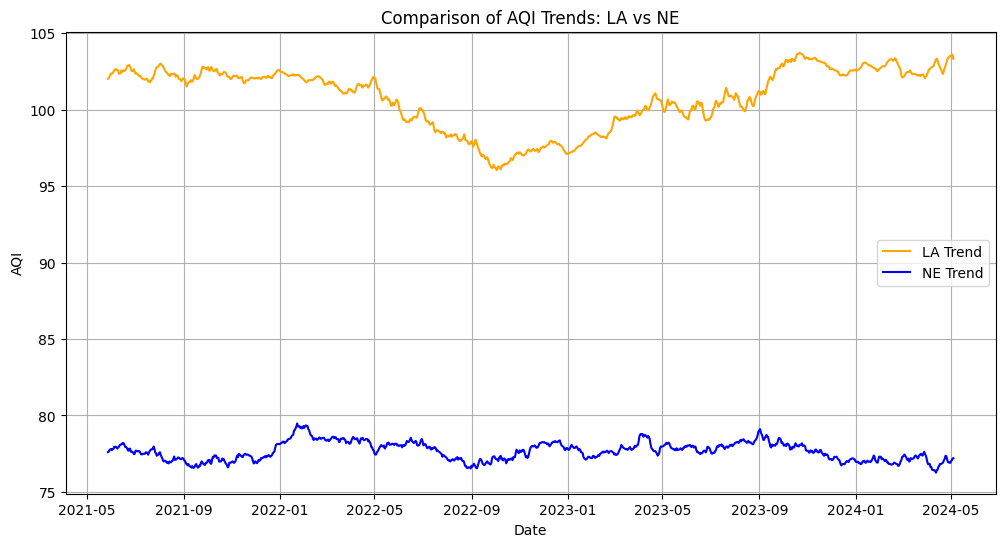

In [71]:
# Plot Trends Together
plt.figure(figsize=(12, 6))
plt.plot(la_aqi_trend, label='LA Trend', color='orange')
plt.plot(ne_aqi_trend, label='NE Trend', color='blue')
plt.title('Comparison of AQI Trends: LA vs NE')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()